# 4.9 Intro to data visualizations with Python

##### This script contains the following points:

#### Import Libraries

#### Import Data

#### Creating Bar Charts

#### Exporting Charts

#### Creating Histograms and Scatterplots

#### Creating Line Charts

# ________________________________________________________________

### Import Libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### Import Data

In [2]:
# Set path
path = r'/Users/mainframe/Documents/Instacart Basket Analysis'

In [3]:
# Import data
latest_df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_new_merged.pkl'))

### Creating Bar Charts

<Axes: xlabel='orders_day_of_week'>

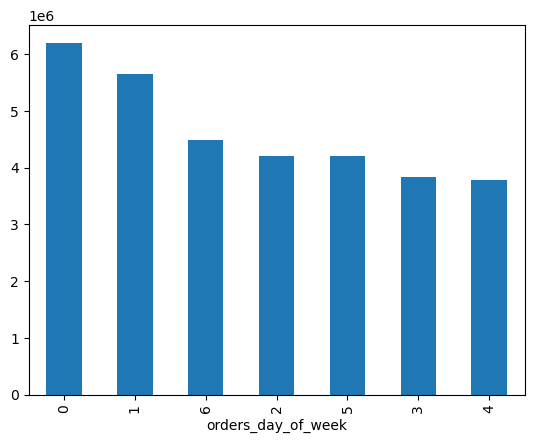

In [4]:
# Create a bar chart
latest_df['orders_day_of_week'].value_counts().plot.bar()

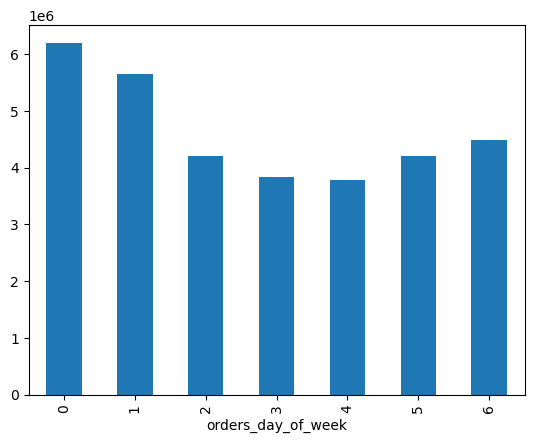

In [5]:
# Re-sort chart by index order
bar = latest_df['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [6]:
# Print frequencies
latest_df['orders_day_of_week'].value_counts()

orders_day_of_week
0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: count, dtype: int64

In [7]:
# Re-sort frequencies by index order
latest_df['orders_day_of_week'].value_counts().sort_index()

orders_day_of_week
0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: count, dtype: int64

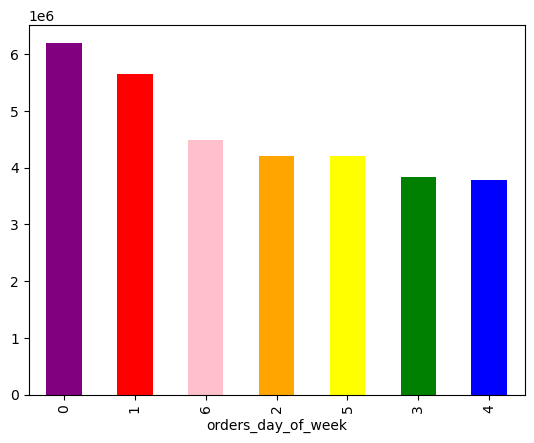

In [8]:
# Change colors of bars in chart
bar = latest_df['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

Text(0, 0.5, 'Orders Placed x 1 million')

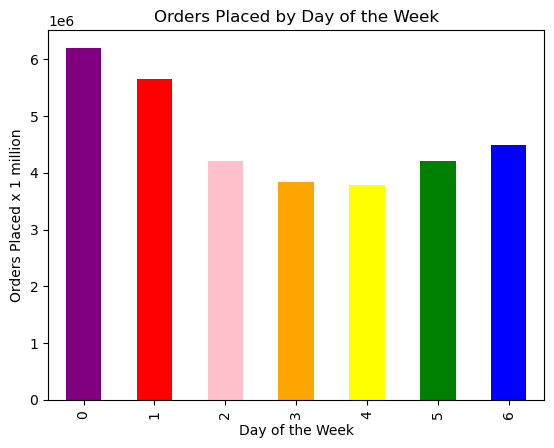

In [9]:
# Sort chart by index
plt.title('Orders Placed by Day of the Week')
bar = latest_df['orders_day_of_week'].value_counts().sort_index().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])
plt.xlabel('Day of the Week')
plt.ylabel('Orders Placed x 1 million')

### Exporting Charts

In [10]:
# Export chart outside of Jupyter in form of image file
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))

### Creating Histograms and Scatterplots

<Axes: ylabel='Frequency'>

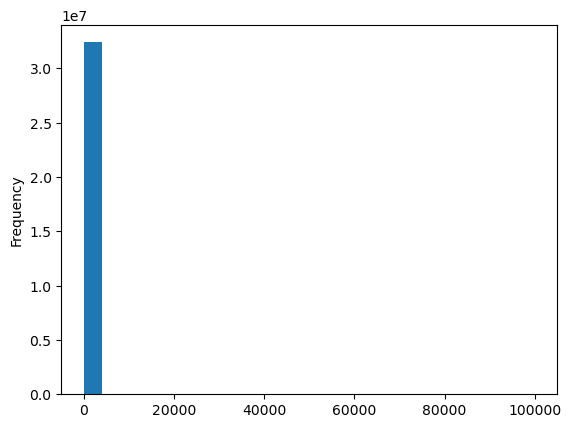

In [11]:
# Create histogram of 'prices' column
latest_df['prices'].plot.hist(bins = 25)

##### This result is not what we're looking for and is caused by the outlier value of 99999.00. Further investigations are to follow.

<Axes: xlabel='prices', ylabel='prices'>

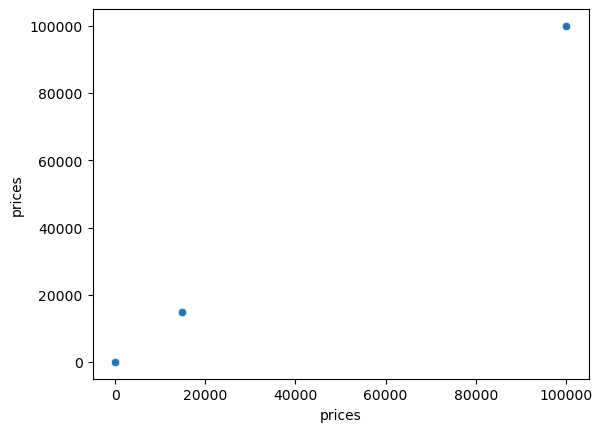

In [12]:
# Create scatterplot to identify outliers
sns.scatterplot(x = 'prices', y = 'prices',data = latest_df)

In [13]:
# Check for outliers above $100
latest_df.loc[latest_df['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,hour_ordered,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_prices,spending_flag,median_days_since_prior_order,frequency_flag
1576,912404,17,12,2,14,5.0,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy days,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
1638,603376,17,22,6,16,4.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy days,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
16522,3264360,135,2,2,21,13.0,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy days,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
16528,892534,135,3,0,8,12.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Busiest day,Busiest days,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
53672,229704,342,8,1,19,30.0,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Busiest days,Average orders,16,Regular customer,114.426619,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32320511,3172853,205650,18,1,9,7.0,21553,17,1,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Busiest days,Most orders,25,Regular customer,351.141618,High spender,6.0,Frequent customer
32347717,2504315,205818,3,5,15,3.0,21553,13,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy days,Most orders,25,Regular customer,170.073770,High spender,13.0,Regular customer
32347727,1108388,205818,5,4,5,1.0,21553,5,1,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Least busy,Least busy days,Fewest orders,25,Regular customer,170.073770,High spender,13.0,Regular customer
32380527,1916142,206049,1,2,17,NaN,21553,2,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy days,Average orders,5,New customer,938.031250,High spender,7.0,Frequent customer


In [14]:
# Convert outlier values into NaNs
latest_df.loc[latest_df['prices'] > 100, 'prices'] = np.nan

In [15]:
# Run max-value check on 'prices' column
latest_df['prices'].max()

25.0

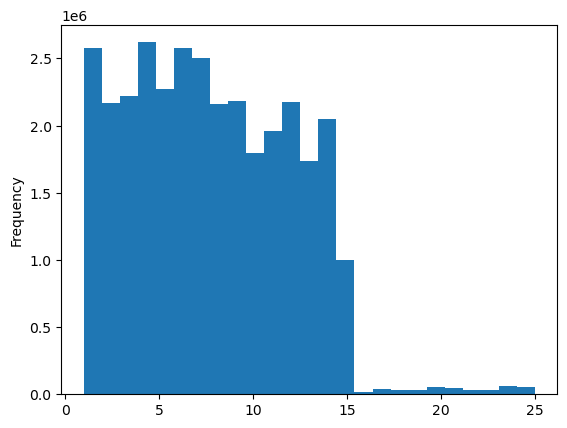

In [16]:
# Retry histogram of 'prices' column
hist = latest_df['prices'].plot.hist(bins = 25)

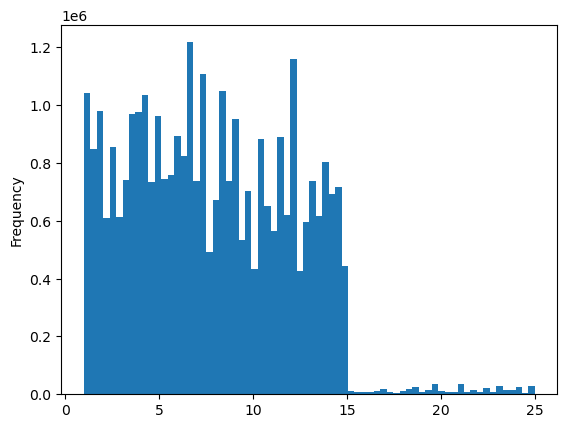

In [17]:
# Increase granularity of histogram
hist_2 = latest_df['prices'].plot.hist(bins = 70)

In [18]:
# Export histogram outside of Jupyter in form of image file
hist_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_prices.png'))

### Creating Line Charts

In [19]:
# Setting the seed
# Create a list holding true/false values to the test np.random.rand() <= 0.7
np.random.seed(4)
dev = np.random.rand(len(latest_df)) <= 0.7

In [20]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [21]:
# Store 70% of the smple in the dataframe 'big'
big = latest_df[dev]

In [22]:
# Store 30% of the sample in the dataframe 'small'
small = latest_df[~dev]

In [23]:
# Check for expected results
len(latest_df)

32404859

In [24]:
len(big) + len(small)

32404859

In [25]:
# Reduce samples to only the columns necessary for the chart
df_2 = small[['orders_day_of_week', 'prices']]

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


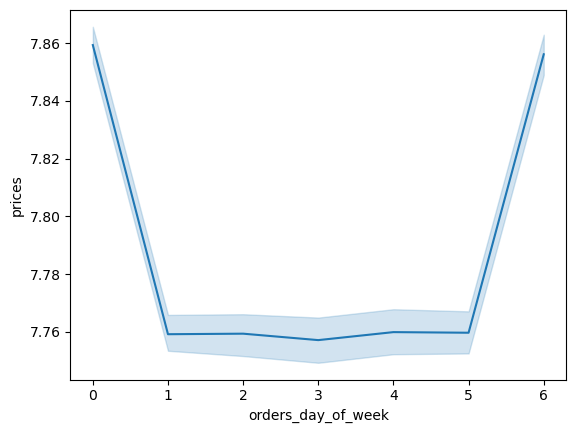

In [26]:
# Create line chart
line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')

In [27]:
# Export line graph outside of Jupyter in form of image file
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_graph.png'))

In [28]:
# Export dataframe as pickle file
latest_df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'opmd_outliers_dropped.pkl'))